# Loading relevant libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

#Loading the Dataset

In [ ]:
from google.colab import files #loading the data set from local drive

In [ ]:
raw_data = files.upload()

Saving 1.04. Real-life example.csv to 1.04. Real-life example.csv


In [ ]:
raw_data = pd.read_csv('1.04. Real-life example.csv') #calling the dataset

#Data Preparation

In [ ]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
raw_data.describe(include='all') #undersatanding the basic info from the summary

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
data = raw_data.drop(['Model'], axis=1)

It is very clear that Model column is not necessary for evalation so dropping this column

In [ ]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

##Feature engineering 

Both in Price and EngineV column has missing values, it is clear that the missing values are less 5% of entire data so removing that specific rows 

In [ ]:
data_no_mv = data.dropna(axis=0) #data without missing values(data_no_mv)  

In [ ]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


From the data it is clear that mean price is abnormal compared to the minimum price, even the max price is so high from 75% of data's price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


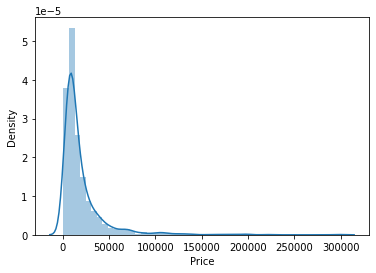

In [ ]:
sn.distplot(data_no_mv['Price'])

Visually it is very clear that plot is not symetrical it is totally on left side, we have some outliers in the data

In [ ]:
q = data_no_mv['Price'].quantile(0.99)       #eliminating the top 0.1% outliers 
data_1 = data_no_mv[data_no_mv['Price']<q]   #assigning the data to new variable
data_1.describe(include='all')               

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


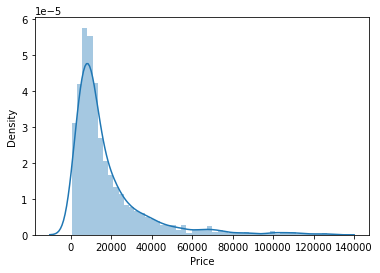

In [ ]:
sn.distplot(data_1['Price'])

After considering 99% of data most of the outliers are eliminated 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


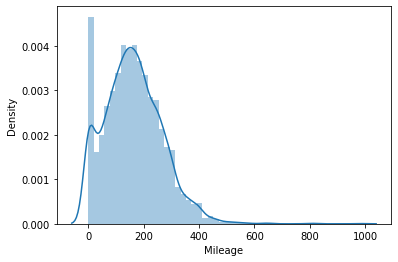

In [ ]:
sn.distplot(data_no_mv['Mileage']) #Checking next important feature Mileage 

In [ ]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

In this feature also considering 99% of the data which will eliminate outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


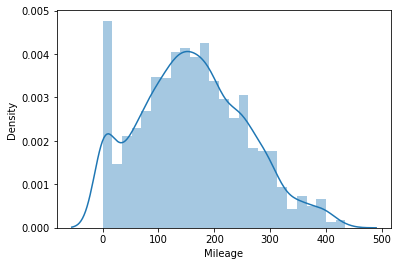

In [ ]:
sn.distplot(data_2['Mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


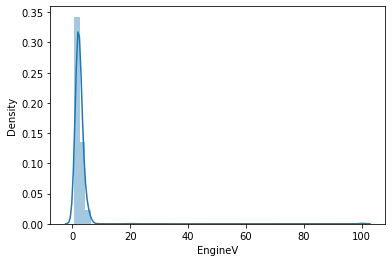

In [ ]:
sn.distplot(data_2['EngineV']) #checking the next feature engineV (engine volume)

for some instance it is clear that engine volume is given around 90 which logically incorrect usually upto 6.5 so we considering only that portion of data

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5] #considering instance less than 6.5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


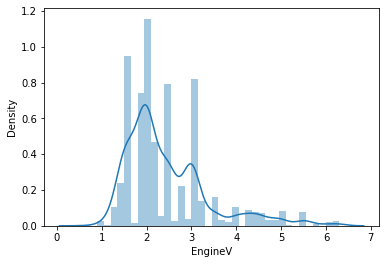

In [ ]:
sn.distplot(data_3['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


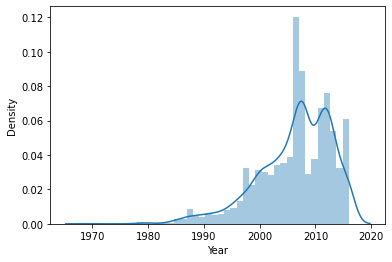

In [ ]:
sn.distplot(data_3['Year'])

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

There are some vehicles which are too old so plot is shifted toward one side, here we are considering data above least 1% 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


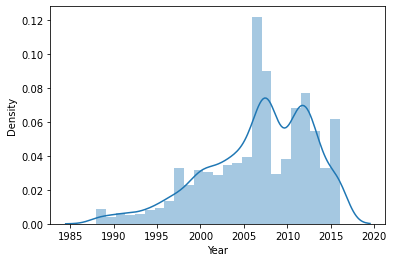

In [ ]:
sn.distplot(data_4['Year'])

In [ ]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


Now the data is clear without any missing values and outliers

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Checking the data visually with respective our target feature to check linearity

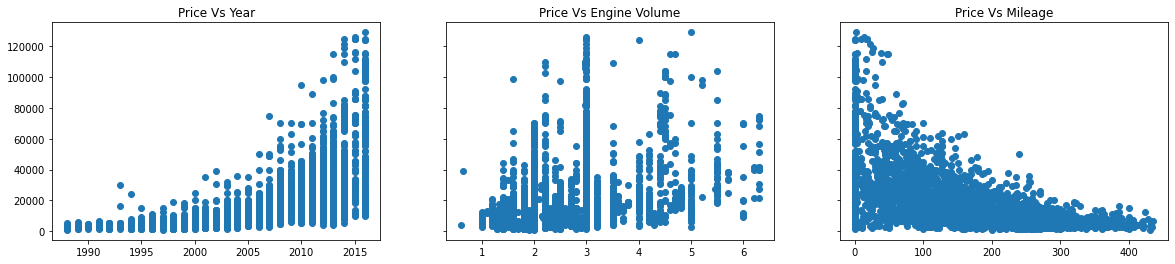

In [ ]:
m, (f1, f2, f3) = plt.subplots(1, 3, sharey=True, figsize = (20,4) ) #ploting price with year, enginev, mileage
f1.scatter(data_cleaned['Year'], data_cleaned['Price'])
f1.set_title('Price Vs Year')
f2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
f2.set_title('Price Vs Engine Volume')
f3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
f3.set_title('Price Vs Mileage')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


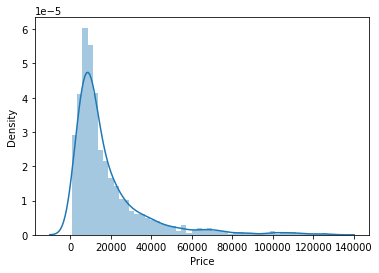

In [ ]:
sn.distplot(data_cleaned['Price']) #no longer need of this feature

In [ ]:
Log_Price = np.log(data_cleaned['Price']) #using logarithemic expression to change into linear
data_cleaned['Log_Price'] = Log_Price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


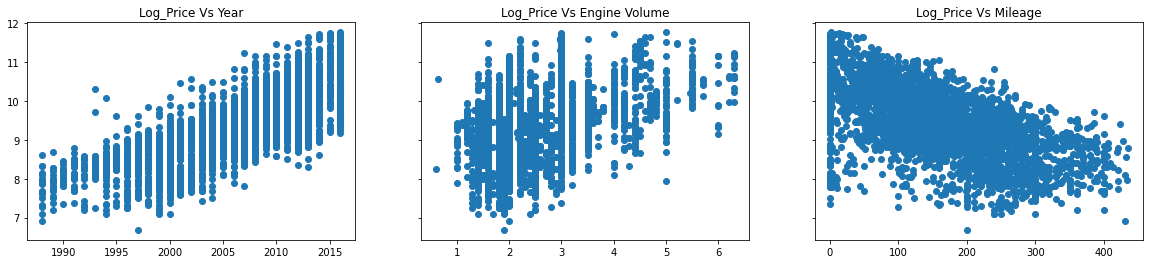

In [ ]:
m, (f1, f2, f3) = plt.subplots(1, 3, sharey=True, figsize = (20,4) )
f1.scatter(data_cleaned['Year'], data_cleaned['Log_Price'])
f1.set_title('Log_Price Vs Year')
f2.scatter(data_cleaned['EngineV'], data_cleaned['Log_Price'])
f2.set_title('Log_Price Vs Engine Volume')
f3.scatter(data_cleaned['Mileage'], data_cleaned['Log_Price'])
f3.set_title('Log_Price Vs Mileage')
plt.show()

####Homoscedasticity is same as we used log transformation and no autocorelation as our data is not from time series but directly from second hand cars sales website 

In [ ]:
data_cleaned = data_cleaned.drop(["Price"], axis=1) #Droping the price feature and considering only Log price feature 

###Checking Multicollinearity

In [ ]:
data_cleaned.columns.values #features in the dataset

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'], dtype=object)

There is corelation between the features, it is logical with year and mileage. And we need to find the degree of linearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing the library to calculate VIF
variables = data_cleaned[['Mileage', 'Year', 'EngineV']] #defining the features to check
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Checking corelation with VIF with stats model as there is no option in sklearn

In [ ]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Vif is usually in arange of 1 to 5 for perfect dataset, some allows upto 6 here we are eliminating year as it has high corelation

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1) #droping the year feature

In [ ]:
data_no_multicollinearity['Brand'].unique() # categorical values cannot accessed in model, here unique categories in brand

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Creating dummies for categorical features using pandas function 

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) # using drop_first=True as for n variations we need n-1 dummies

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
data_with_dummies.columns.values #checking all columns 

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',           #rearranging the order of columns for the sake of visibility 
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]

The data is preprocessed and is ready for further evalution 

In [ ]:
data_preprocessed.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#Linear Regression Model

Declaring the inputs and the targets 

In [ ]:
targets = data_preprocessed['Log_Price']  #assigning the Output feature
inputs  = data_preprocessed.drop(['Log_Price'], axis=1) #assigining the input feature(all columns excluding log price)

Sacaling the data using Standard Scaler. For the purpose of standardizing import the standardscaler from sklearn preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #assigning the StandardScaler
scaler.fit(inputs) #fitting the inputs 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
inputs_scaled = scaler.transform(inputs) #transforming the inputs by assigning it to new variable inputs_scaled. scaling as no effect on dummy variables

###Training and Testing the Model

In [ ]:
from sklearn.model_selection import train_test_split  #impoting train test from sklearn
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.20, random_state=365) #selecting 80% for training, random state to keep shuffle constant

###Creating Regression

In [ ]:
reg = LinearRegression() #assigning reg to linearregression 
reg.fit(x_train,y_train)  #fitting the training data to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred  = reg.predict(x_train) #y_pred or y_hat as per multiple regression formula it is used for predicitiing 

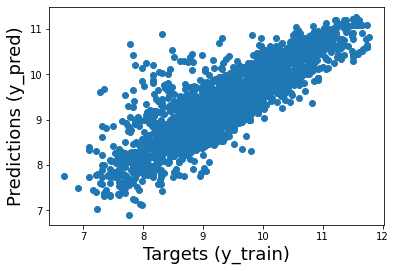

In [ ]:
plt.scatter(y_train, y_pred) #targests vs predictions
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_pred)', size = 18)
plt.show()

Residuels are the estimates of the errors, residuals must be normally distributed with mean of zero (Regression assumption) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuels Report')

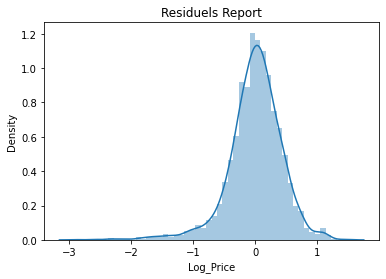

In [ ]:
sn.distplot(y_train - y_pred)
plt.title('Residuels Report')

In [ ]:
reg.score(x_train,y_train) #finding r**2 

0.744996578792662

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)


0.1847456775641665


Variablity is good as it is almost 0.75

###Finding Weights and Bias

In [ ]:
reg.intercept_ #intercepting of 

9.415239458021299

In [ ]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features']) #as reading coefficients in array placing them in data frame
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


Weight interpretations there are some positive weights and some negative, positive means increasing in value and vice versa 

But for dummy variables it is different Audi is bench mark as if is 1 remaining are zero, so if positive for brand means value is greater than Audi and vice versa

In [ ]:
y_pred_test = reg.predict(x_test) 

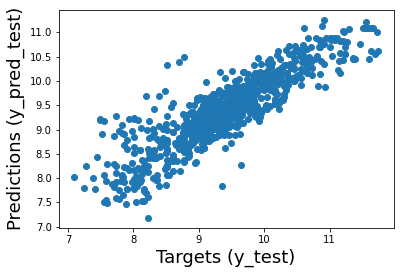

In [ ]:
plt.scatter(y_test, y_pred_test) #ploting the results
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_pred_test)', size = 18)
plt.show()

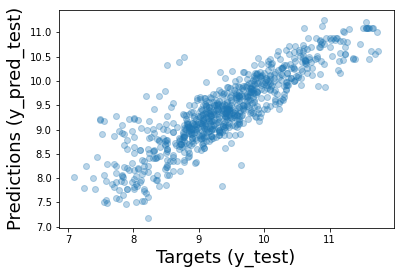

In [ ]:
plt.scatter(y_test, y_pred_test, alpha=0.3) #aplha is used to get clear picture of the prediction
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_pred_test)', size = 18)
plt.show()

From the plot it is clear that top price prediction is good compared the low cost instance(intencity of the colour)

####Checking the Performance

In [ ]:
data_perf = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction']) #As our Log Price is not in orginal costs converting back by using exponential with Numpy
data_perf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [ ]:
data_perf['Target'] = np.exp(y_test) #test target values are also in log expressions this also converting back using exponential function
data_perf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


Above table shows many null values because pandas defaultly uses index which atained first for we need to reset the indexs as we done for training set

In [ ]:
y_test = y_test.reset_index(drop=True) #reseting the indexes 
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Log_Price, dtype: float64

In [ ]:
 data_perf['Target'] = np.exp(y_test) #assigning the target again as indexes are reseted 
data_perf.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


#####Finding the Residuals and Differences

In [ ]:
data_perf['Residuals'] = data_perf['Target'] - data_perf['Prediction'] #(residuals = Targets - predicitions)

In [ ]:
data_perf['Differencein%'] = np.absolute(data_perf['Residuals']/data_perf['Target']*100) #Difference in percentage
data_perf

,Prediction,Target,Residuals,Differencein%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [ ]:

data_perf.describe() #summary report of test data

,Prediction,Target,Residuals,Differencein%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [ ]:
pd.options.display.max_rows=999 #as pandas won't display all values as default so using display options
pd.set_option('display.float_format', lambda x: '%.2f' % x) #float points with 2 decimals 
data_perf.sort_values(by=['Differencein%']) #arranging the values with least difference at first 

,Prediction,Target,Residuals,Differencein%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


We can find in the above table that huge difference for last few instance